In [1]:
!pip install beautifulsoup4
!pip install  requests
!pip install lxml

C:\Users\Aayush\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
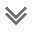

In [2]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
code = requests.get(url)
raw_code = code.text
raw_code = BeautifulSoup(raw_code, "lxml")
raw_code

In [3]:
table_code = raw_code.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [4]:
data = []
tags = table_code.find_all('tr')
for i in tags:
    data.append(i.text)
    
data

['\n#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop\n',
 '\n\n\nNorth America\n\n124,203,338\n\n1,607,375\n\n119,367,550\n+2,064\n3,228,413\n8,032\n\n\n\n\n\nNorth America\n\n\n\n\n\n\n\n\n\n\n',
 '\n\n\nAsia\n\n213,931,890\n+10,372\n1,534,823\n+12\n198,488,609\n+20,348\n13,908,458\n15,572\n\n\n\n\n\nAsia\n\n\n\n\n\n\n\n\n\n\n',
 '\n\n\nEurope\n\n245,805,043\n\n2,014,568\n\n241,357,016\n+21,312\n2,433,459\n6,445\n\n\n\n\n\nEurope\n\n\n\n\n\n\n\n\n\n\n',
 '\n\n\nSouth America\n\n67,917,777\n+120\n1,349,293\n+14\n66,116,951\n+710\n451,533\n10,211\n\n\n\n\n\nSouth America\n\n\n\n\n\n\n\n\n\n\n',
 '\n\n\nOceania\n\n13,959,634\n\n25,943\n\n13,814,460\n\n119,231\n71\n\n\n\n\n\nAustralia/Oceania\n\n\n\n\n\n\n\n\n\n\n',
 

In [5]:
all_data = []
for i in data:
    all_data.append(i.split('\n'))
    
all_data

[['',
  '#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['',
  '',
  '',
  'North America',
  '',
  '124,203,338',
  '',
  '1,607,375',
  '',
  '119,367,550',
  '+2,064',
  '3,228,413',
  '8,032',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  'Asia',
  '',
  '213,931,890',
  '+10,372',
  '1,534,823',
  '+12',
  '198,488,609',
  '+20,348',
  '13,908,458',
  '15,572',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  'Europe',
  '',
  '245,805,043',
  '',
  '

In [6]:
final_data = []
for i in all_data:
    if i[1] !="":
        final_data.append(i[1:])
final_data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '104,964,592',
  '',
  '1,142,384                                ',
  '',
  '102,282,833',
  '',
  '1,539,375',
  '2,866',
  '313,509',
  '3,412',
  '1,163,079,725',
  '3,473,899',
  '334,805,269 ',
  'North America',
  '',
  '32930',
  '',
  '',
  '4,598',
  ''],
 ['2',
  'India',
  '44,684,917',
  '',
  '530,760                                ',
  '',
  '44,152,258',
  '',
  '1,899',
  'N/A',
  '31,767',
  '377',
  '917,828,117',
  '652,501',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6502',
  '',
  '',
  '1',
  ''],
 ['3',
  'France',
  '39,586,293',
 

In [7]:
import csv
file = open('covid_data.csv','w')
x = csv.writer(file)
x.writerows(final_data)
file.close()

In [8]:
pwd

'C:\\Users\\Aayush\\pythonClass415'

In [9]:
import pandas as pd
df = pd.read_csv('covid_data.csv',encoding = "latin1",index_col = '#')
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
#,,,,,,,,,,,,,,,,,,,,,
1,USA,"104,964,592",NaN,"1,142,384",NaN,"102,282,833",NaN,"1,539,375","2,866","313,509",...,"3,473,899","334,805,269",North America,NaN,32930,NaN,NaN,"4,598",NaN,NaN
2,India,"44,684,917",NaN,"530,760",NaN,"44,152,258",NaN,"1,899",NaN,"31,767",...,"652,501","1,406,631,776",Asia,NaN,"312,6502",NaN,NaN,1,NaN,NaN
3,France,"39,586,293",NaN,"164,712",NaN,"39,351,757",NaN,"69,824",869,"603,592",...,"4,139,547","65,584,518",Europe,NaN,23980,NaN,NaN,"1,065",NaN,NaN
4,Germany,"38,002,611",NaN,"167,289",NaN,"37,585,500","+2,600","249,822",NaN,"453,040",...,"1,458,359","83,883,596",Europe,NaN,25011,NaN,NaN,"2,978",NaN,NaN
5,Brazil,"36,987,682",NaN,"698,047",NaN,"36,116,408",NaN,"173,227",NaN,"171,753",...,"296,146","215,353,593",South America,NaN,63093,NaN,NaN,804,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,"36,295",...,NaN,799,Europe,NaN,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,"626,161",Africa,NaN,"62,616626,161",NaN,NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
!pip install plotly==5.13.0

In [32]:
x = list(df['Country,Other'])[0:10]
ya = list(df['TotalCases'])[0:10]
yb = list(df['TotalRecovered'])[0:10]
yc = list(df['TotalDeaths'])[0:10]
y1 = list(map(lambda y:int(y.replace(",","")),ya))[0:10]
y2 = list(map(lambda y:int(y.replace(",","")),yb))[0:10]
y3 = list(map(lambda y:int(y.replace(",","")),yc))[0:10]

In [19]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=x, y=y1)])
fig.show()

In [34]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    
    go.Bar(name='Total cases', x = x, y = y1),
    go.Bar(name='Total cases', x = x, y = y3),
    go.Bar(name='Total Recovered', x = x, y = y2),
    
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=x, values=y1)])
fig.show()

231